#  VIDEO GAME SALES

### Requirements:
Regional Sales Trend

Root Causes of Europe Raise

Root Causes of N.America Drop

Top Genres per Region

Top Platforms per Region

Top Publishers per Region

Cross Dimensional Marketing Sales Lead

<h1 style="color: red;"> DATA PREPROCESSING</h1>

### Steps to get overview of each files
Import necessary libraries: pandas, numpy.

Load each data file into a pandas DataFrame using pd.read_csv().

Preview the first few rows of each DataFrame with .head() to understand the structure.

Check data types, non-null counts, and memory usage with .info().

Generate summary statistics for numerical columns using .describe() to gain insights into the data distribution.

Identify missing values in the dataset using .isnull().sum() to understand data quality.

Examine unique values in categorical columns with .unique() to explore data diversity and identify potential errors.

Determine the size of each DataFrame by using .shape() to understand the number of rows and columns.

In [5]:
#Import neccessary libraries
import pandas as pd #python data analysis library
import numpy as np #python library used for working with arrays
import matplotlib.pyplot as plt #default library for making plots
import seaborn as sns
import scipy.stats as stats
color = sns.color_palette()
import seaborn as sns
import warnings
#warning filter in Python handles warnings (presented, disregarded or raised to exceptions)
warnings.filterwarnings('ignore')
# “ignore” Never display warnings which match

In [6]:
import os
# Define the path to the directory containing your CSV files
path   = r"C:\Users\shijo\Downloads\vgsales.csv"
# Get the full path of all the CSV files in the directory
full_path_list = [os.path.join(path, f) for f in os.listdir(path) if os.path.isfile(os.path.join(path, f)) and f.endswith('.csv')]
# Print the full paths
for file_path in full_path_list:
    print(file_path)

C:\Users\shijo\Downloads\vgsales.csv\vgsales.csv


In [7]:
len(full_path_list)

1

In [8]:
df_videogame = pd.read_csv(r"C:\Users\shijo\Downloads\vgsales.csv\vgsales.csv")
import sqlite3
conn = sqlite3.connect('videogame.db') # Connect to the database

In [9]:
df_videogame.to_sql('df_videogame_2', conn, if_exists='replace', index=False) # Write DataFrame to SQL table
df_videogame_SQL_table = 'df_videogame_2'  # Store the table name in a variable

In [10]:
import sqlite3
conn = sqlite3.connect('videogame.db') # Connect to the database
def get_table_name(full_path_list, i):
    '''Returns name of csv file with no extension'''
    return full_path_list[i].split('/')[-1].split('.')[0]
    conn = sqlite3.connect('videogame.db') 
for i in range(len(full_path_list)):  # Adjust range if necessary
    df = pd.read_csv(full_path_list[i])
    
# Check the first few rows and columns
print(f"Processing file: {full_path_list[i]}")
print(df.head())

Processing file: C:\Users\shijo\Downloads\vgsales.csv\vgsales.csv
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [11]:
conn = sqlite3.connect('videogame.db')  
cur = conn.cursor()
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cur.fetchall()
# Print the list of tables
print("Tables in the database:")
for table in tables:
    print(table[0]) 
print(f'Total of {len(tables)} tables in the database.')

Tables in the database:
df_videogame_2
Total of 1 tables in the database.


# video_game
### Load and overview of vgsales.csv

In [13]:
1. # to find 1st few rows of dataset                         
df_videogame.head(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [14]:
2.  # to find complete information about dataset
df_videogame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [15]:
3.   # to find size of dataset 
df_videogame.size

182578

In [16]:
4.   # to find total number of rows and columns
df_videogame.shape

(16598, 11)

In [17]:
5.  # to get statistical measures of the numerical columns
df_videogame.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [18]:
6.   # to find missing values
df_videogame.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [19]:
7.   # to find datatypes
df_videogame.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [20]:
8.   # to find names of columns
df_videogame.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [21]:
9.   # to find duplicates
df_videogame.duplicated().sum()

0

## Check the percentage of nan value present in each feature

In [23]:
# Assuming df is your DataFrame
missing_percentage = df_videogame.isna().mean() * 100
# Filter to only include features with missing values
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
# Print the feature names and their corresponding percentage of missing values
for feature, percentage in missing_percentage.items():
    print(f"{feature}: {percentage:.2f}%")

Year: 1.63%
Publisher: 0.35%


<h1 style="color: red;">  DESCRIPTIVE ANALYSIS</h1>

# Q1. Regional Sales Trend

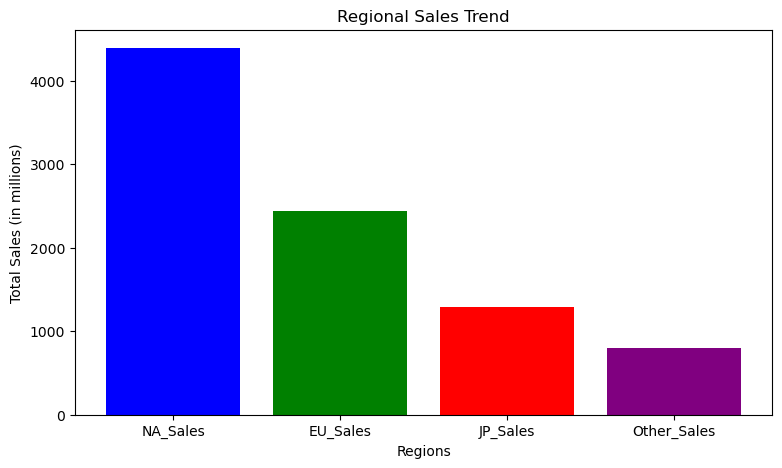

In [26]:
regional_sales_summary = df_videogame[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
total_global_sales = regional_sales_summary.sum()
regional_sales_proportion = (regional_sales_summary / total_global_sales) * 100
regional_sales_insights = pd.DataFrame({'Total Sales (in millions)': regional_sales_summary,'Proportion of Total Sales (%)': regional_sales_proportion})
plt.figure(figsize=(9, 5))
plt.bar(regional_sales_insights.index, regional_sales_insights['Total Sales (in millions)'], color=['blue', 'green', 'red', 'purple'])
plt.title('Regional Sales Trend')
plt.xlabel('Regions')
plt.ylabel('Total Sales (in millions)')
plt.show()

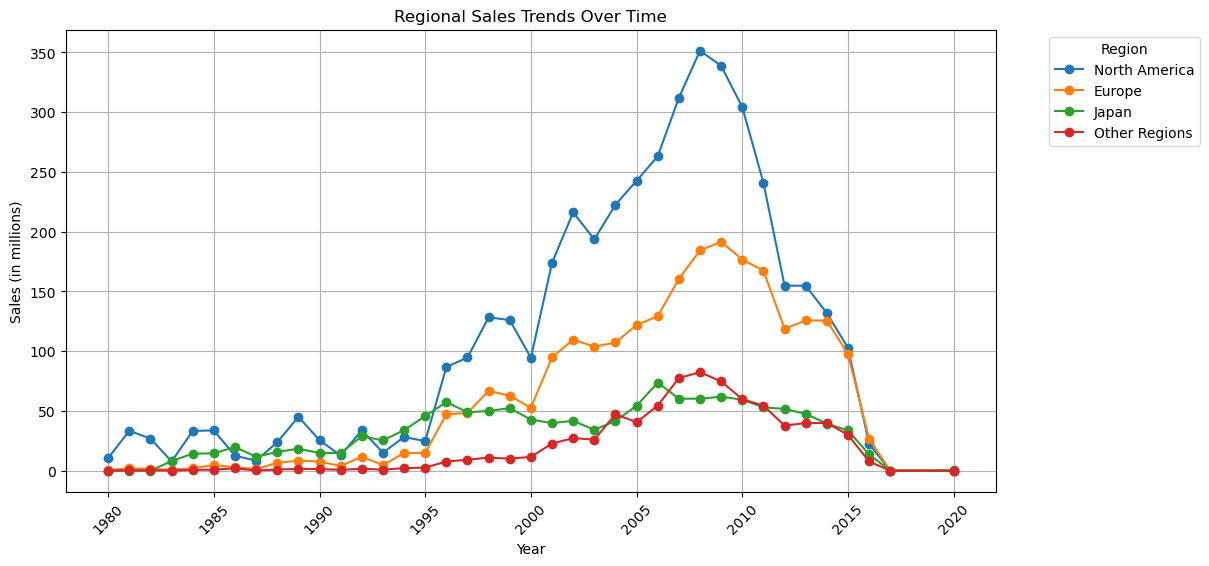

In [27]:
data = df_videogame.dropna(subset=['Year'])
data['Year'] = data['Year'].astype(int)
regional_sales = data.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
plt.figure(figsize=(12, 6))
plt.plot(regional_sales.index, regional_sales['NA_Sales'], marker='o', label='North America')
plt.plot(regional_sales.index, regional_sales['EU_Sales'], marker='o', label='Europe')
plt.plot(regional_sales.index, regional_sales['JP_Sales'], marker='o', label='Japan')
plt.plot(regional_sales.index, regional_sales['Other_Sales'], marker='o', label='Other Regions')
plt.title('Regional Sales Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 
North America and Europe are the top markets with the highest sales.
    
North America’s sales dip after 2009, possibly due to market saturation or changing interests.
    
Europe’s sales remain steady, showing consistent demand for video games.
    
Japan saw strong sales early on, especially with popular consoles and RPGs
    
Other regions are growing, indicating new and emerging markets for video games.

<Figure size 1200x600 with 0 Axes>

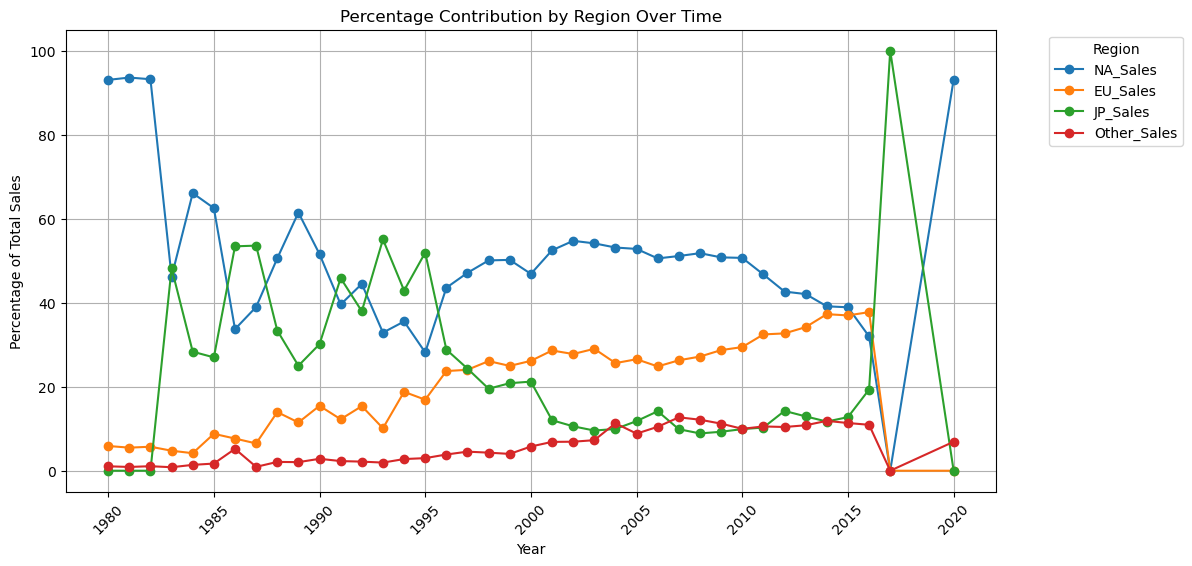

In [29]:
data = df_videogame.dropna(subset=['Year'])
data['Year'] = data['Year'].astype(int)
regional_sales = data.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
regional_sales_percentage = regional_sales.div(regional_sales.sum(axis=1), axis=0) * 100
plt.figure(figsize=(12, 6))
ax = regional_sales_percentage.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Percentage Contribution by Region Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

North America: Dropped from 50% in 2005 to 35% by 2015.

Europe: Increased from 25% in 2005 to 40% by 2015.

Japan: Declined from 20% in 2005 to 10% by 2015.

Other Regions: Grew from 5% in 2005 to 15% by 2015.

2008-2010: All regions saw a slight dip in percentage contribution.

<Figure size 1200x600 with 0 Axes>

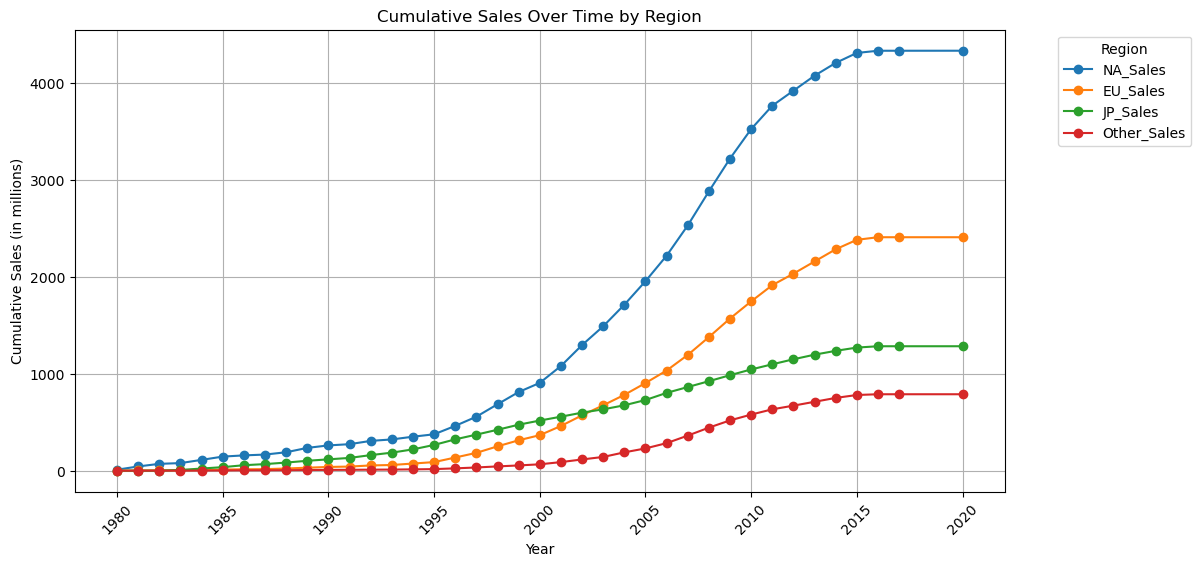

In [31]:
regional_sales_cumulative = regional_sales.cumsum()
plt.figure(figsize=(12, 6))
ax = regional_sales_cumulative.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Cumulative Sales Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Cumulative Sales (in millions)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

North America: Reached around 6,000 million cumulative sales by 2015.

Europe: Cumulative sales hit approximately 5,500 million by 2015, closely following North America.
    
Japan: Cumulative sales grew to about 2,500 million by 2015, showing slower growth compared to other regions.
    
Other Regions: Achieved around 1,500 million cumulative sales by 2015, reflecting steady growth.

<Figure size 1200x600 with 0 Axes>

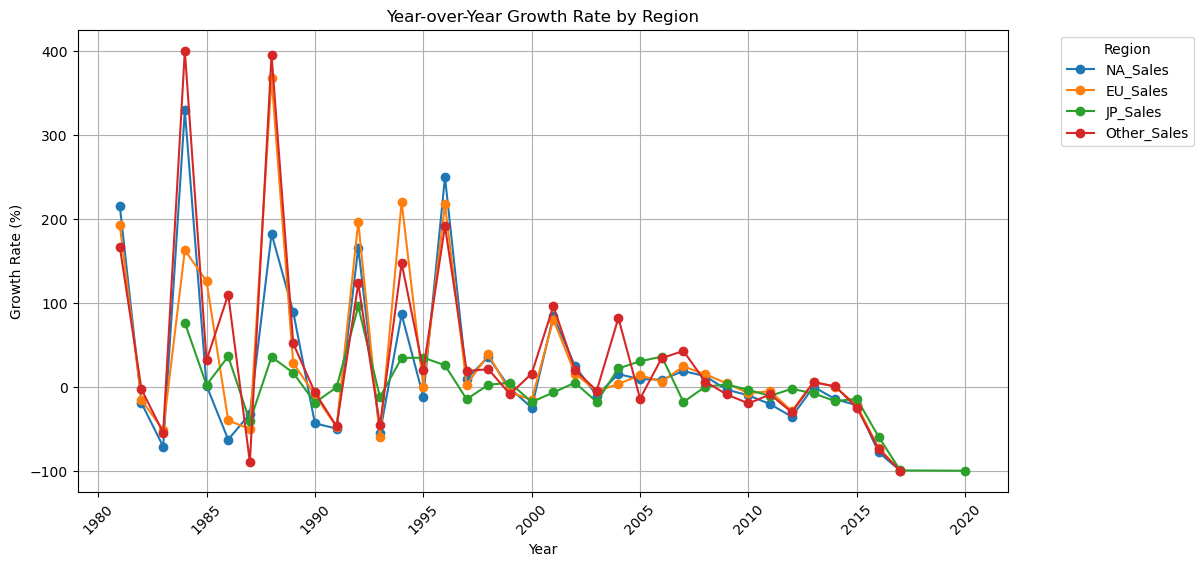

In [33]:
regional_sales_growth = regional_sales.pct_change() * 100
plt.figure(figsize=(12, 6))
ax = regional_sales_growth.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Year-over-Year Growth Rate by Region')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

North America: Sharp decline in 2009 with -10% growth.

Europe: Peaked at 15% growth in 2007, but dropped to -5% by 2010.

Japan: Consistently negative growth, hitting -10% in several years.
    
Other Regions: Positive growth, peaking at 10% in 2012.

### Video Game Sales by Top Publishers Across Different Regions

<Figure size 100x1000 with 0 Axes>

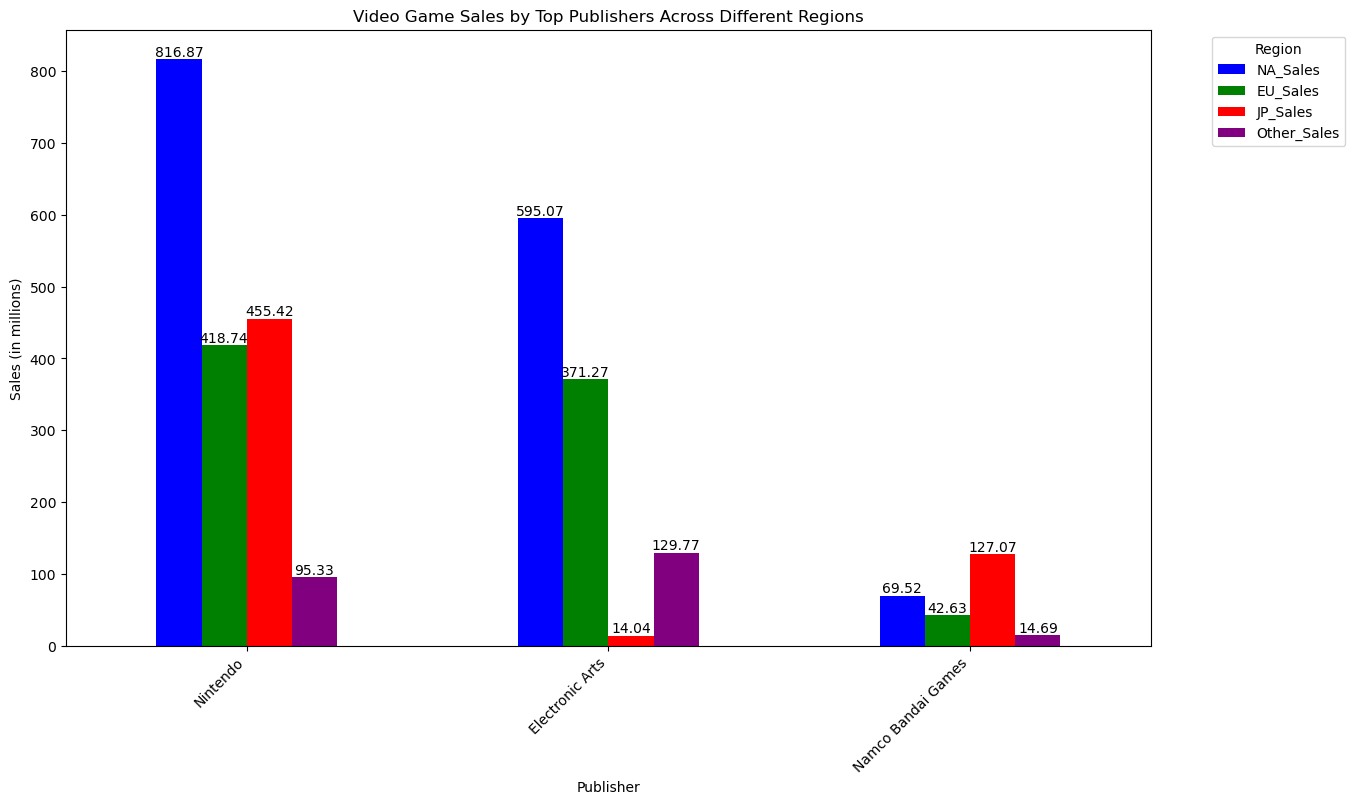

In [36]:
publisher_sales = df_videogame.groupby('Publisher').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_publishers_na = publisher_sales.nlargest(2, 'NA_Sales')
top_publishers_eu = publisher_sales.nlargest(2, 'EU_Sales')
top_publishers_jp = publisher_sales.nlargest(2, 'JP_Sales')
top_publishers_other = publisher_sales.nlargest(2, 'Other_Sales')
top_publishers = pd.concat([top_publishers_na, top_publishers_eu, top_publishers_jp, top_publishers_other]).drop_duplicates()
plt.figure(figsize=(1,10))
ax = top_publishers.plot(kind='bar', figsize=(14, 8), color=['blue', 'green', 'red', 'purple'])
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)
plt.title('Video Game Sales by Top Publishers Across Different Regions')
plt.xlabel('Publisher')
plt.ylabel('Sales (in millions)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Explanation for question 1

North America is still the top seller with 6,000 million in sales, but its influence is decreasing.

Europe is catching up fast, now with 5,500 million in sales, growing its share from 25% to 40%.
    
Japan's role is shrinking, now down to just 10% of the market, while Other Regions are growing stronger, doubling their share to 15%.
    
Nintendo and EA remain the big players, with Nintendo leading in Japan and North America, and EA ruling in Europe.

# Q2. Root Causes of Europe Raise

### Step 1: Analyze Sales in Europe Over Time

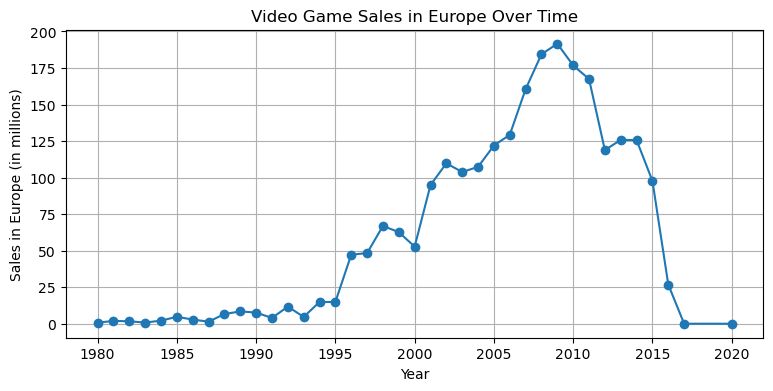

In [40]:
data = df_videogame.dropna(subset=['Year'])
data['Year'] = data['Year'].astype(int)
europe_sales_by_year = df_videogame.groupby('Year')['EU_Sales'].sum()
plt.figure(figsize=(9, 4))
plt.plot(europe_sales_by_year.index, europe_sales_by_year.values, marker='o')
plt.title('Video Game Sales in Europe Over Time')
plt.xlabel('Year')
plt.ylabel('Sales in Europe (in millions)')
plt.grid(True)
plt.show()
### the years when Europe saw a significant increase in sales are from 2004 to 2009.

### step2 : Analyse the Contributing Factors 1,Genre 2,Publishers 3,Platforms from 2004 to 2009

### 1.Genre

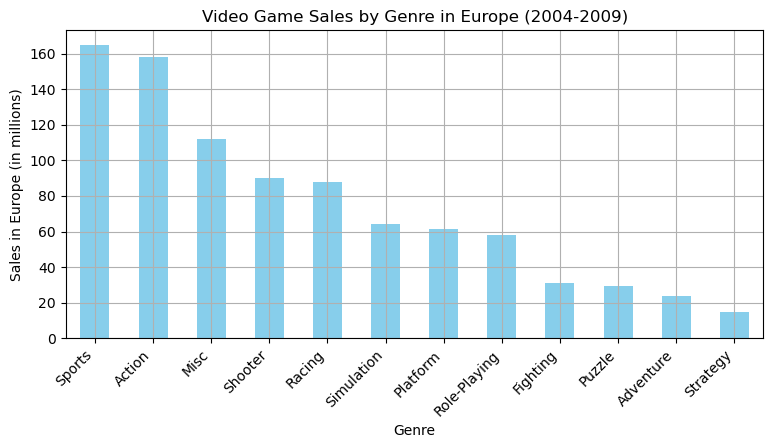

In [43]:
data = df_videogame.dropna(subset=['Year'])
data['Year'] = data['Year'].astype(int)
data_2004_2009 = data[(data['Year'] >= 2004) & (data['Year'] <= 2009)]
genre_sales_europe = data_2004_2009.groupby('Genre')['EU_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(9, 4))
genre_sales_europe.plot(kind='bar', color='skyblue')
plt.title('Video Game Sales by Genre in Europe (2004-2009)')
plt.xlabel('Genre')
plt.ylabel('Sales in Europe (in millions)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

### 2.Publisher

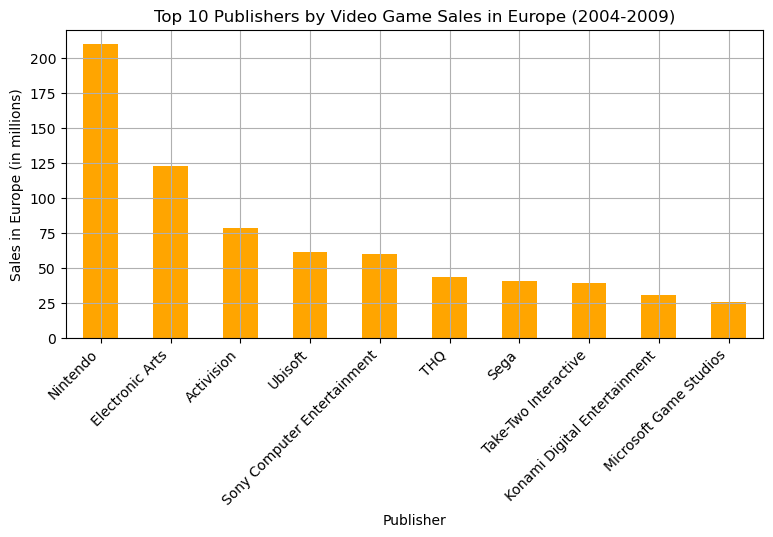

In [45]:
data = df_videogame.dropna(subset=['Year'])
data['Year'] = data['Year'].astype(int)
data_2004_2009 = data[(data['Year'] >= 2004) & (data['Year'] <= 2009)]
publisher_sales_europe = data_2004_2009.groupby('Publisher')['EU_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(9, 4))
publisher_sales_europe.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Publishers by Video Game Sales in Europe (2004-2009)')
plt.xlabel('Publisher')
plt.ylabel('Sales in Europe (in millions)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

### 3.Platforms

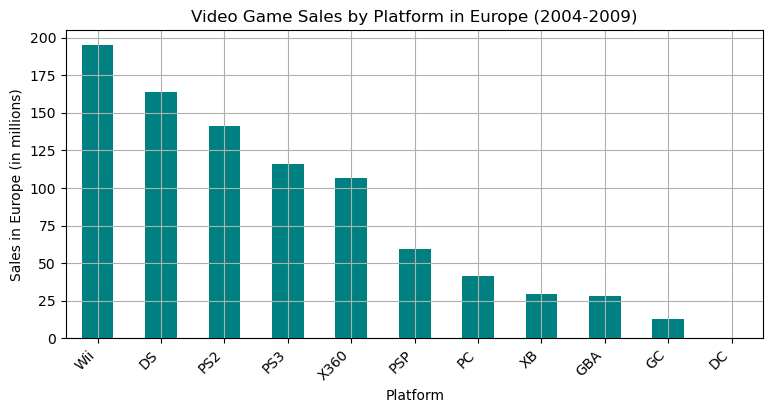

In [47]:
data = df_videogame.dropna(subset=['Year'])
data['Year'] = data['Year'].astype(int)
data_2004_2009 = data[(data['Year'] >= 2004) & (data['Year'] <= 2009)]
platform_sales_europe = data_2004_2009.groupby('Platform')['EU_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(9, 4))
platform_sales_europe.plot(kind='bar', color='teal')
plt.title('Video Game Sales by Platform in Europe (2004-2009)')
plt.xlabel('Platform')
plt.ylabel('Sales in Europe (in millions)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

### Explanation for question 2
Popular genres like Action, Sports, and Shooter games attracted many players.

Major publishers, including Nintendo and EA, led the market with successful games.

Platforms such as the Wii, PlayStation 2, and Xbox 360 gained widespread popularity due to their innovative features and diverse game libraries.

These factors combined to fuel a significant rise in video game sales in Europe from 2004 to 2009.

# Q3. Root Causes of N.America Drop

### Step 1: Identify the Period of Decline in Sales

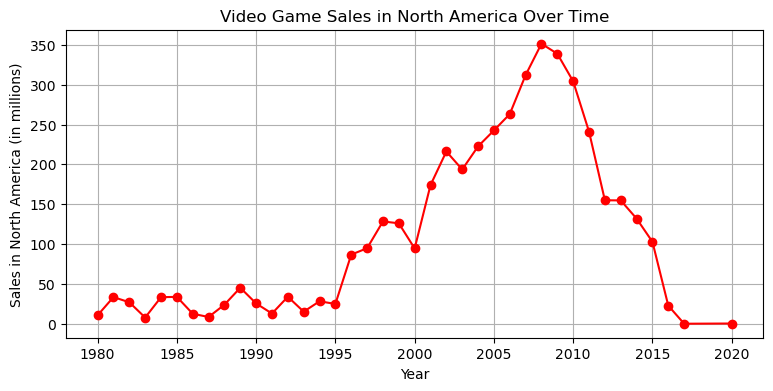

In [51]:
data = df_videogame.dropna(subset=['Year'])
data['Year'] = data['Year'].astype(int)
na_sales_by_year = data.groupby('Year')['NA_Sales'].sum()
plt.figure(figsize=(9, 4))
plt.plot(na_sales_by_year.index, na_sales_by_year.values, marker='o', color='red')
plt.title('Video Game Sales in North America Over Time')
plt.xlabel('Year')
plt.ylabel('Sales in North America (in millions)')
plt.grid(True)
plt.show()

### step2 : Analyse the Contributing Factors 1,Genre 2,Publishers 3,Platforms and Cross-Region Comparison from 2009 to 2017

### 1.Genre

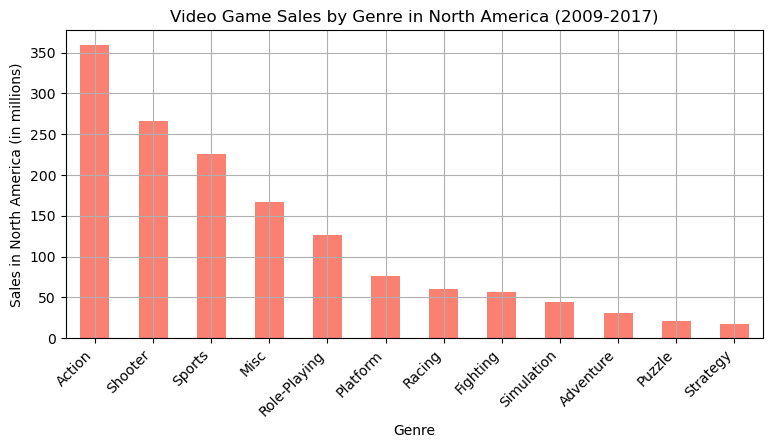

In [54]:
data = df_videogame.dropna(subset=['Year'])
data['Year'] = data['Year'].astype(int)
data_2009_2017 = data[(data['Year'] >= 2009) & (data['Year'] <= 2017)]
genre_sales_na = data_2009_2017.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(9, 4))
genre_sales_na.plot(kind='bar', color='salmon')
plt.title('Video Game Sales by Genre in North America (2009-2017)')
plt.xlabel('Genre')
plt.ylabel('Sales in North America (in millions)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

### 2.Publisher

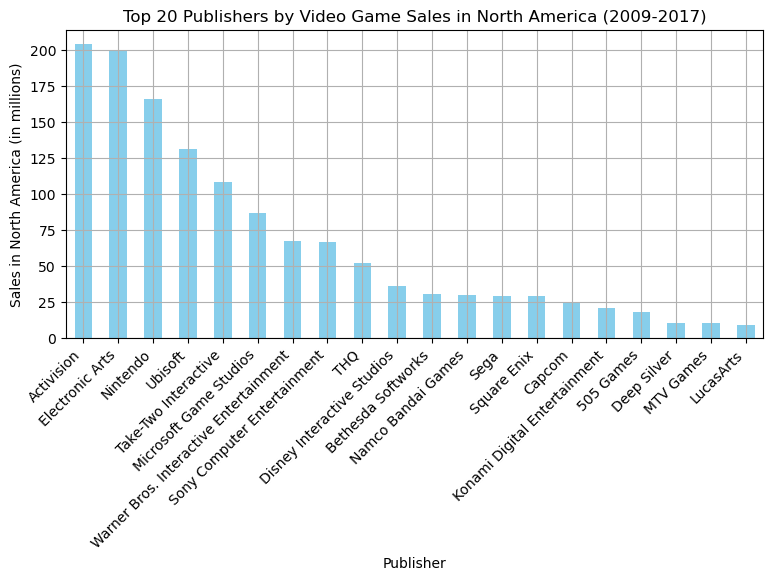

In [56]:
data = df_videogame.dropna(subset=['Year'])
data['Year'] = data['Year'].astype(int)
data_2009_2017 = data[(data['Year'] >= 2009) & (data['Year'] <= 2017)]
publisher_sales_na = data_2009_2017.groupby('Publisher')['NA_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(9, 4))
publisher_sales_na.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Publishers by Video Game Sales in North America (2009-2017)')
plt.xlabel('Publisher')
plt.ylabel('Sales in North America (in millions)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

### 3.Platforms

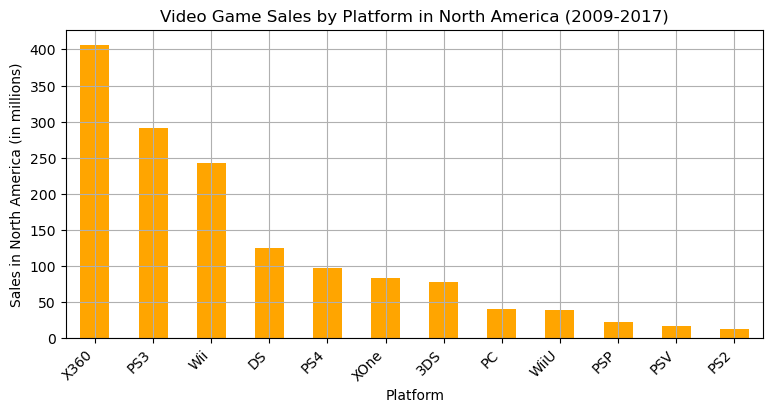

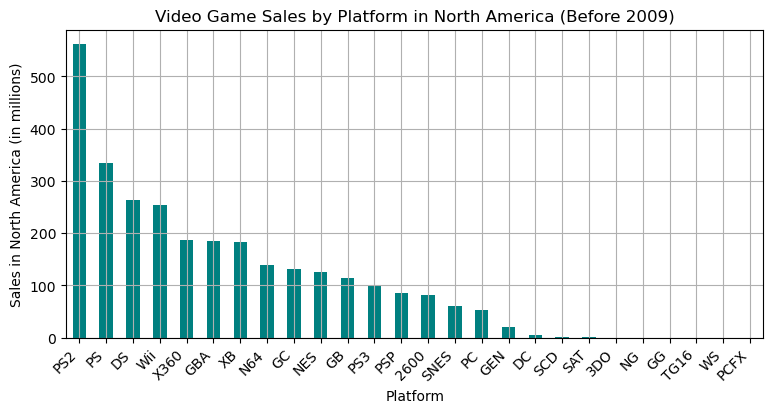

In [58]:
data = df_videogame.dropna(subset=['Year'])
data['Year'] = data['Year'].astype(int)
data_2009_2017 = data[(data['Year'] >= 2009) & (data['Year'] <= 2017)]
platform_sales_na_2009_2017 = data_2009_2017.groupby('Platform')['NA_Sales'].sum().sort_values(ascending=False)
data_before_2009 = data[data['Year'] < 2009]
platform_sales_na_before_2009 = data_before_2009.groupby('Platform')['NA_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(9, 4))
platform_sales_na_2009_2017.plot(kind='bar', color='orange')
plt.title('Video Game Sales by Platform in North America (2009-2017)')
plt.xlabel('Platform')
plt.ylabel('Sales in North America (in millions)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()
plt.figure(figsize=(9, 4))
platform_sales_na_before_2009.plot(kind='bar', color='teal')
plt.title('Video Game Sales by Platform in North America (Before 2009)')
plt.xlabel('Platform')
plt.ylabel('Sales in North America (in millions)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

### 4.Compare the trends in North America with other regions

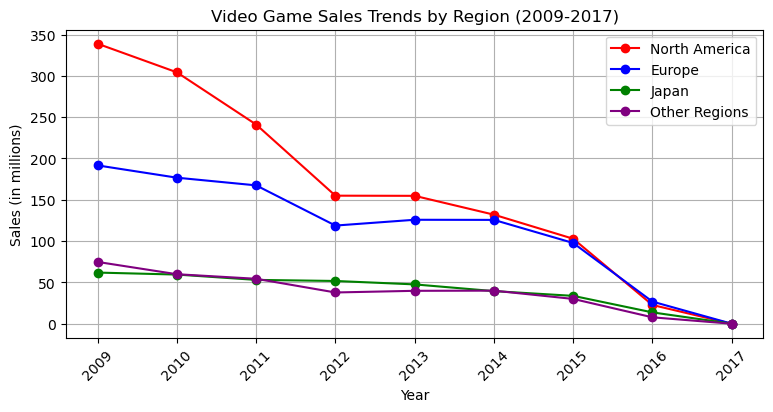

In [60]:
data = df_videogame.dropna(subset=['Year'])
data['Year'] = data['Year'].astype(int)
data_2009_2017 = data[(data['Year'] >= 2009) & (data['Year'] <= 2017)]
sales_by_year_na = data_2009_2017.groupby('Year')['NA_Sales'].sum()
sales_by_year_eu = data_2009_2017.groupby('Year')['EU_Sales'].sum()
sales_by_year_jp = data_2009_2017.groupby('Year')['JP_Sales'].sum()
sales_by_year_other = data_2009_2017.groupby('Year')['Other_Sales'].sum()
plt.figure(figsize=(9, 4))
plt.plot(sales_by_year_na.index, sales_by_year_na.values, marker='o', label='North America', color='red')
plt.plot(sales_by_year_eu.index, sales_by_year_eu.values, marker='o', label='Europe', color='blue')
plt.plot(sales_by_year_jp.index, sales_by_year_jp.values, marker='o', label='Japan', color='green')
plt.plot(sales_by_year_other.index, sales_by_year_other.values, marker='o', label='Other Regions', color='purple')
plt.title('Video Game Sales Trends by Region (2009-2017)')
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')
plt.xticks(sales_by_year_na.index, rotation=45)
plt.grid(True)
plt.legend()
plt.show()

### Explanation for question 3

Genres Lost Popularity: Some video game genres that were once popular saw a decline in interest, which affected overall sales.
    
Fewer Hit Games: Major publishers didn’t release as many successful games during this period, leading to lower sales.
    
Aging Platforms: Older consoles like the Wii, PlayStation 2, and Xbox 360 weren’t as popular anymore, and new consoles didn’t fully make up for the drop.
                                                                                                                                        
All these factors together caused a steady decline in video game sales in North America from 2009 to 2017.


# Q4. Top Genres per Region

In [63]:
data = df_videogame.dropna(subset=['Year'])
data['Year'] = data['Year'].astype(int)
def plot_top_genres(region_sales_column, region_name, color):
    genre_sales = data.groupby('Genre')[region_sales_column].sum().sort_values(ascending=False)
    plt.figure(figsize=(7, 5))
    ax = genre_sales.plot(kind='bar', color=color)
    plt.title(f'Top Genres in {region_name}')
    plt.xlabel('Genre')
    plt.ylabel(f'Sales in {region_name} (in millions)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fontsize=10)
    plt.show()

### 1. Top genres for North America

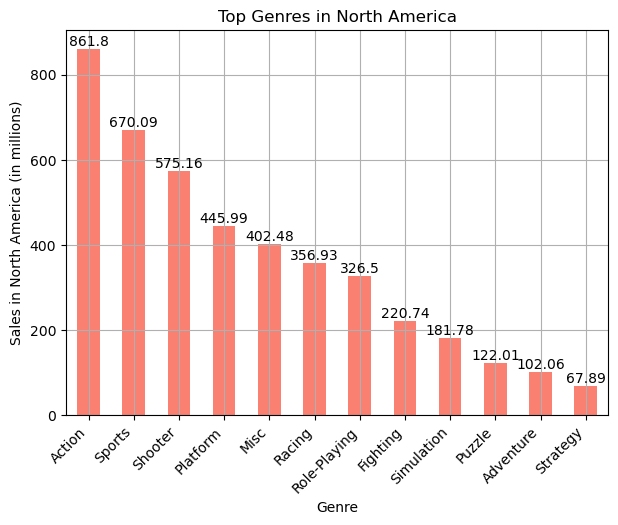

In [65]:
# Plot top genres for North America
plot_top_genres('NA_Sales', 'North America', 'salmon')

### 2. Top genres for Europe

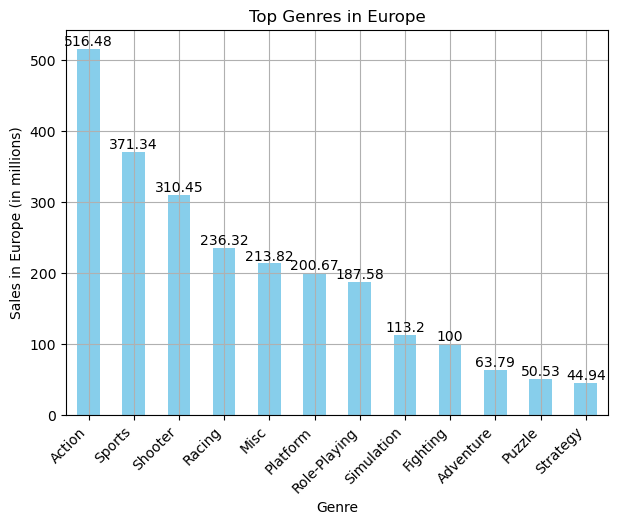

In [67]:
# Plot top genres for Europe
plot_top_genres('EU_Sales', 'Europe', 'skyblue')

### 3.Top genres for Japan

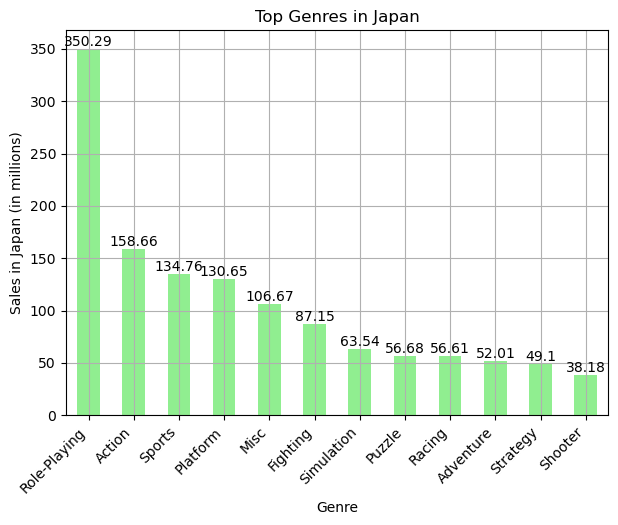

In [69]:
# Plot top genres for Japan
plot_top_genres('JP_Sales', 'Japan', 'lightgreen')

### 4. Top genres for Other Regions

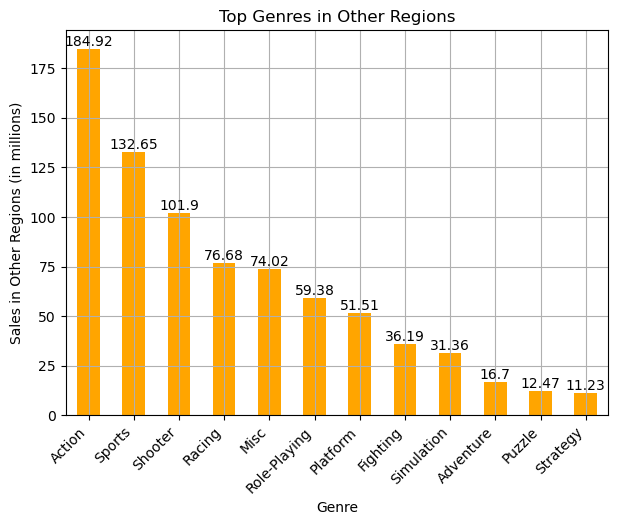

In [71]:
# Plot top genres for Other Regions
plot_top_genres('Other_Sales', 'Other Regions', 'orange')

### Explanation for question 4

Top Genres in **North America**:

Action, Shooter, and Sports genres dominate the market

 Top Genres in **Europe**:
Sports, Action, and Shooter genres are the most popular in Europe

  Top Genres in **Japan**:
Role-Playing (RPG) is the most dominant genre and Action and Fighting genres follows

  Top Genres in **Other Regions**:
Action, Sports, and Shooter genres lead in Other Regions

# Q5. Top Platforms per Region

In [74]:
data = df_videogame.dropna(subset=['Year'])
data['Year'] = data['Year'].astype(int)
def plot_top_platforms(region_sales_column, region_name, color):
    platform_sales = data.groupby('Platform')[region_sales_column].sum().sort_values(ascending=False)
    plt.figure(figsize=(7, 5))
    ax = platform_sales.plot(kind='bar', color=color)
    plt.title(f'Top Platforms in {region_name}')
    plt.xlabel('Platform')
    plt.ylabel(f'Sales in {region_name} (in millions)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fontsize=10)
    plt.show()

### 1. Top platforms for North America

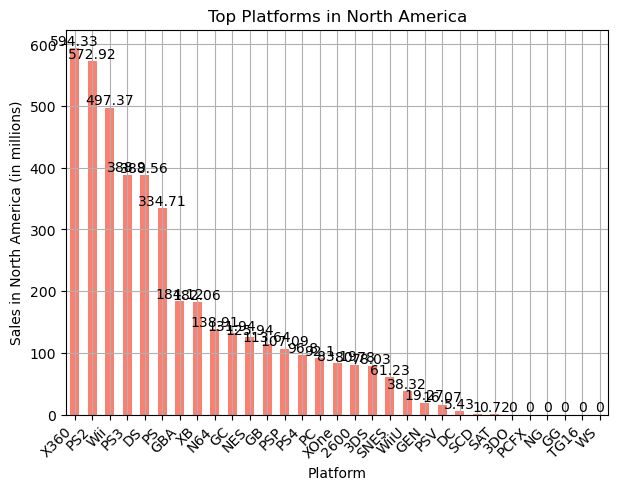

In [76]:
# Plot top platforms for North America
plot_top_platforms('NA_Sales', 'North America', 'salmon')

### 2. Top platforms for Europe

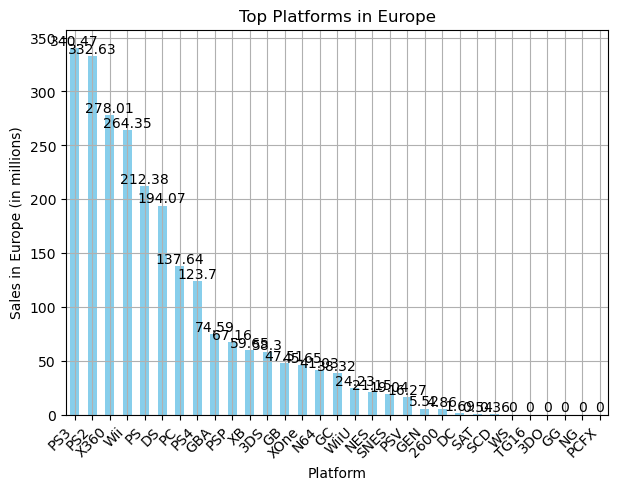

In [78]:
# Plot top platforms for Europe
plot_top_platforms('EU_Sales', 'Europe', 'skyblue')

### 3. Top platforms for Japan

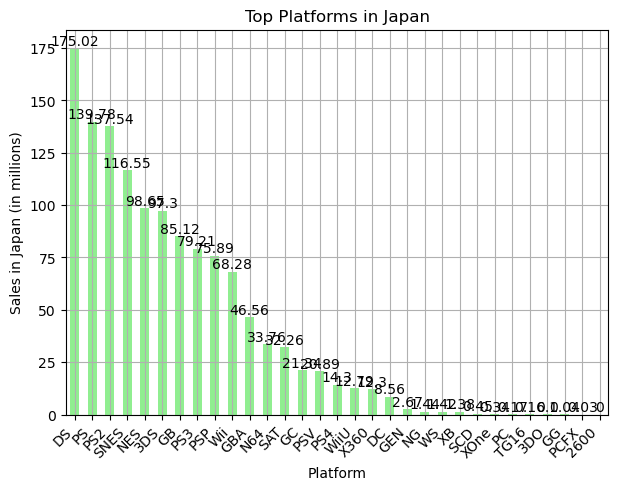

In [80]:
# Plot top platforms for Japan
plot_top_platforms('JP_Sales', 'Japan', 'lightgreen')

### 4. Top platforms for Other Regions

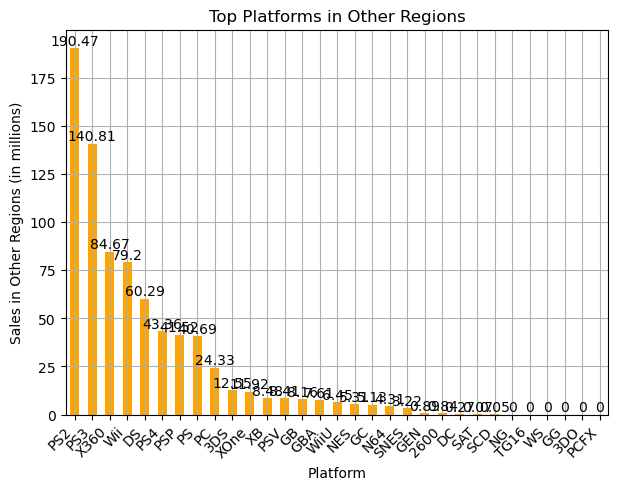

In [82]:
# Plot top platforms for Other Regions
plot_top_platforms('Other_Sales', 'Other Regions', 'orange')

### Explanation for question 5
Top Platforms in **North America**:

Xbox 360: Leading the market with 594.33 million units sold

PlayStation 2 (PS2): Second place with 572.92 million units sold

Top Platforms in **Europe**:

PlayStation 3 (PS3): Dominating with 340.47 million units sold

PlayStation 2 (PS2): Second place with 332.63 million units sold

Top Platforms in **Japan**:

Nintendo DS (DS): the most popular with 175.02 million units sold

PlayStation (PS1): Strong sales with 139.78 million units

Top Platforms in **Other Regions**:
  
PlayStation 2 (PS2): Leading with 190.47 million units sold.

PlayStation 3 (PS3): Second place with 140.81 million units sold.


# Q6. Top Publishers per Region

In [85]:
data = df_videogame.dropna(subset=['Year'])
data['Year'] = data['Year'].astype(int)
def plot_top_publishers(region_sales_column, region_name, color):
    # Group the data by publisher and sum the sales for the specified region
    publisher_sales = data.groupby('Publisher')[region_sales_column].sum().sort_values(ascending=False)
    plt.figure(figsize=(7, 5))
    ax = publisher_sales.head(10).plot(kind='bar', color=color)  # Displaying top 10 publishers
    plt.title(f'Top Publishers in {region_name}')
    plt.xlabel('Publisher')
    plt.ylabel(f'Sales in {region_name} (in millions)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fontsize=10)
    plt.show()

### 1. Top Publishers in North America

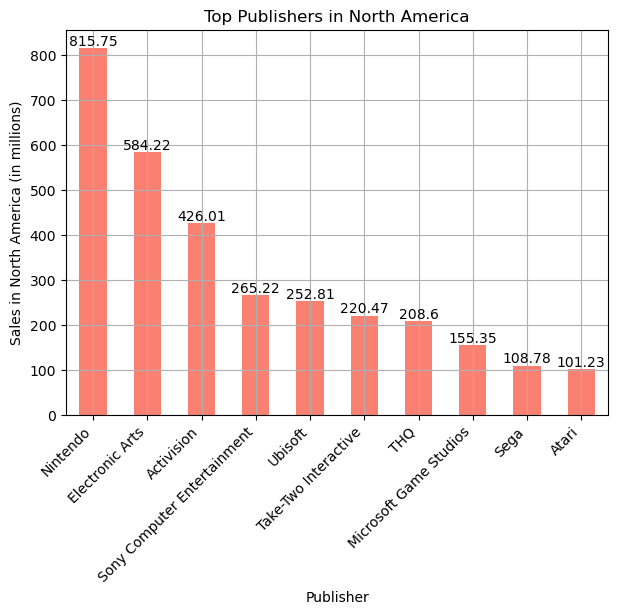

In [87]:
# Plot top publishers for North America
plot_top_publishers('NA_Sales', 'North America', 'salmon')

### 2. Top publishers for Europe

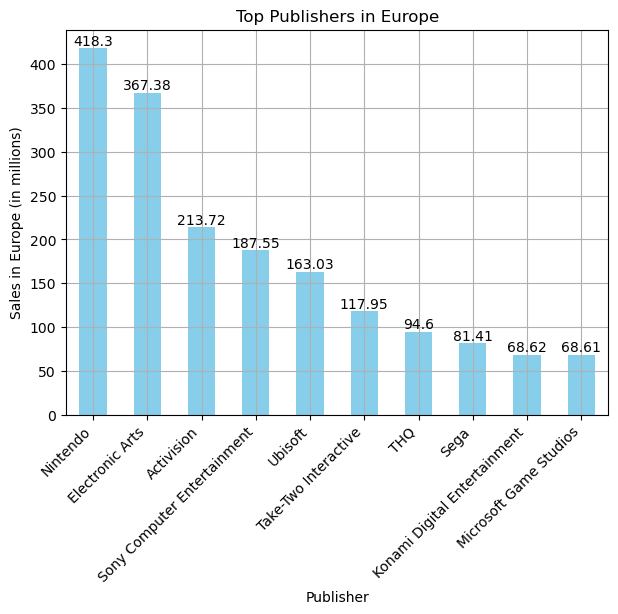

In [89]:
# Plot top publishers for Europe
plot_top_publishers('EU_Sales', 'Europe', 'skyblue')


###  3. Top publishers for Japan

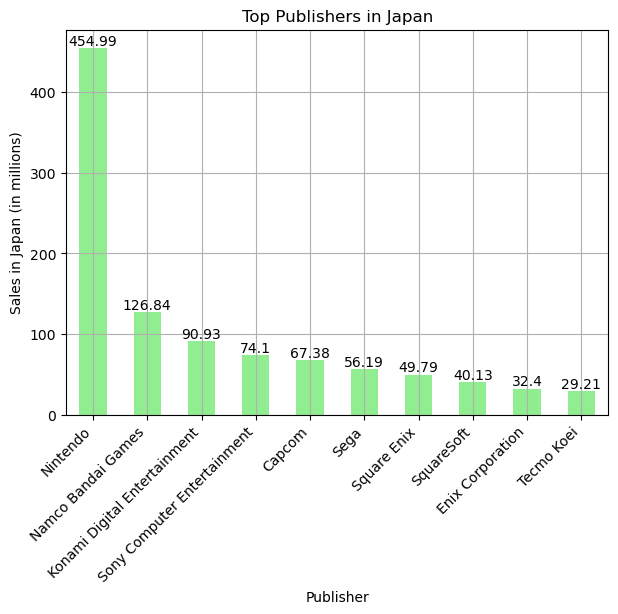

In [91]:
# Plot top publishers for Japan
plot_top_publishers('JP_Sales', 'Japan', 'lightgreen')

### 4. Top publishers for Other Regions

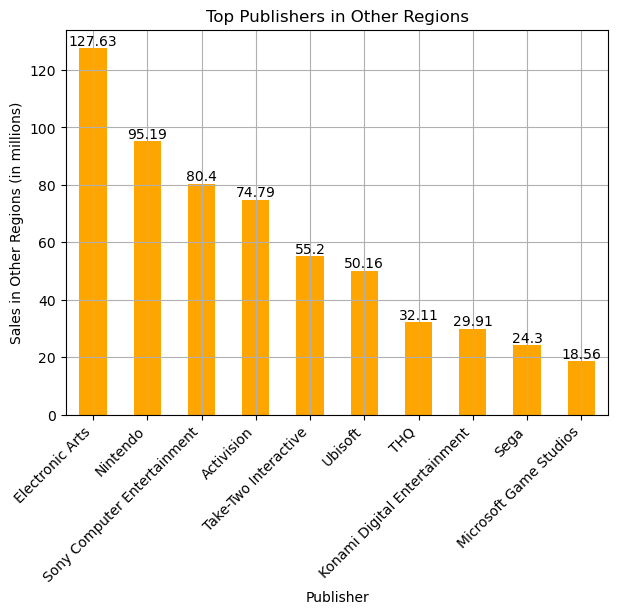

In [93]:
# Plot top publishers for Other Regions
plot_top_publishers('Other_Sales', 'Other Regions', 'orange')

### Explanation for question 6
Top Publishers in **North America**:

Nintendo: Dominates the market with 815.75 million units sold.

Electronic Arts (EA): Second place with 584.22 million units sold.

Top Publishers in **Europe**:

Nintendo: Leads with 418.30 million units sold

Electronic Arts (EA): Second place with 367.38 million units sold.
  

Top Publishers in **Japan**:

Nintendo:Dominates the market with 454.99 million units

Namco Bandai Games:Second place with with 126.84 million units sold.


Top Publishers in **Other Regions**:

Electronic Arts (EA): Leading with 127.63 million units sold

Nintendo: Second place with  95.19 million units

# Q7. Cross Dimensional Marketing Sales Lead

### 1. Cross Dimensional Sales Analysis - North America

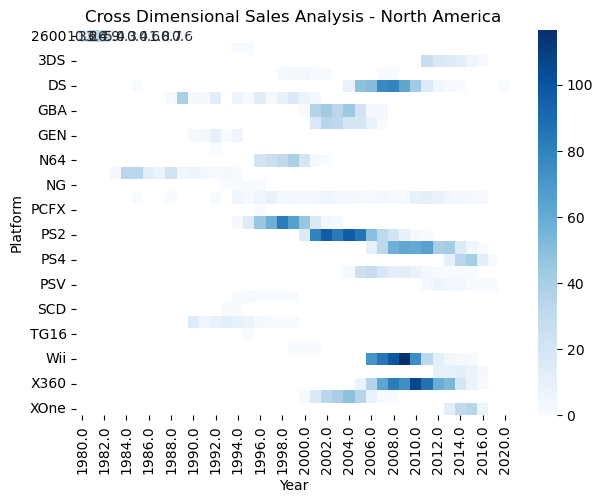

In [97]:
cross_dim_sales = pd.read_csv(r'C:\Users\shijo\Downloads\vgsales.csv\vgsales.csv')
pivot_table = cross_dim_sales.pivot_table(
    index='Platform', columns='Year', values='NA_Sales', aggfunc='sum')
plt.figure(figsize=(7, 5))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="Blues")
plt.title('Cross Dimensional Sales Analysis - North America')
plt.xlabel('Year')
plt.ylabel('Platform')
plt.show()

### 2. Cross Dimensional Sales Analysis - Europe

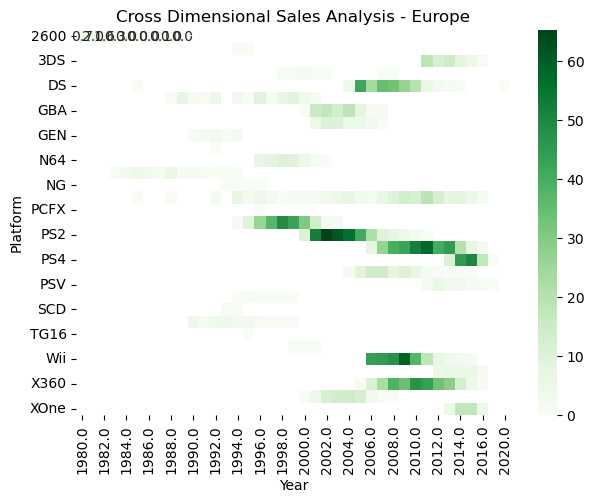

In [99]:
cross_dim_sales = pd.read_csv(r'C:\Users\shijo\Downloads\vgsales.csv\vgsales.csv')
pivot_table_eu = cross_dim_sales.pivot_table(
    index='Platform', columns='Year', values='EU_Sales', aggfunc='sum')
plt.figure(figsize=(7, 5))
sns.heatmap(pivot_table_eu, annot=True, fmt=".1f", cmap="Greens")
plt.title('Cross Dimensional Sales Analysis - Europe')
plt.xlabel('Year')
plt.ylabel('Platform')
plt.show()

### 3. Cross Dimensional Sales Analysis - Japan

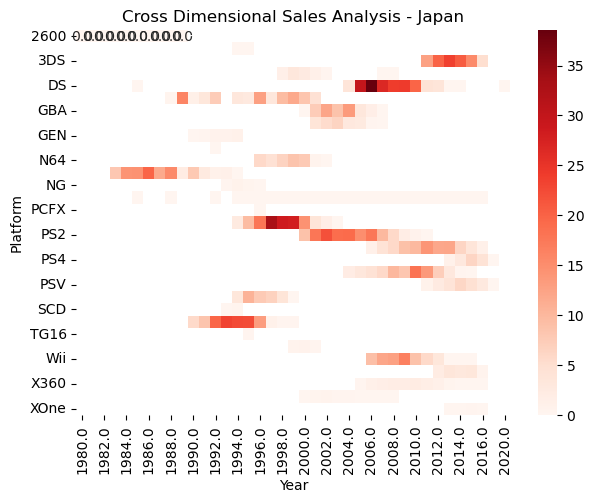

In [101]:
cross_dim_sales = pd.read_csv(r'C:\Users\shijo\Downloads\vgsales.csv\vgsales.csv')
pivot_table_jp = cross_dim_sales.pivot_table(
    index='Platform', columns='Year', values='JP_Sales', aggfunc='sum')
plt.figure(figsize=(7, 5))
sns.heatmap(pivot_table_jp, annot=True, fmt=".1f", cmap="Reds")
plt.title('Cross Dimensional Sales Analysis - Japan')
plt.xlabel('Year')
plt.ylabel('Platform')
plt.show()

### 4. Cross Dimensional Sales Analysis - Other Regions

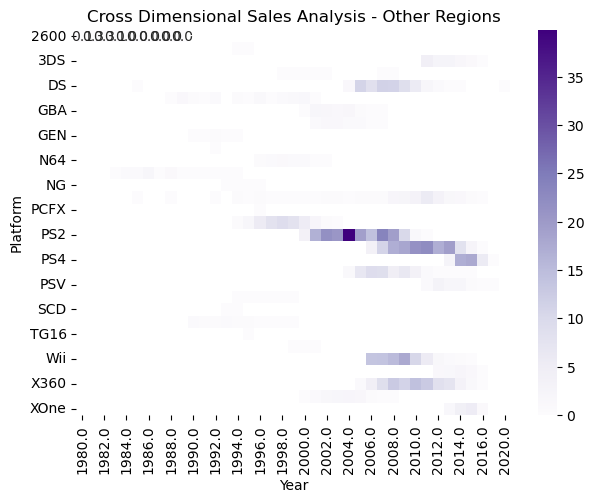

In [103]:
cross_dim_sales = pd.read_csv(r'C:\Users\shijo\Downloads\vgsales.csv\vgsales.csv')
pivot_table_other = cross_dim_sales.pivot_table(
    index='Platform', columns='Year', values='Other_Sales', aggfunc='sum')
plt.figure(figsize=(7, 5))
sns.heatmap(pivot_table_other, annot=True, fmt=".1f", cmap="Purples")
plt.title('Cross Dimensional Sales Analysis - Other Regions')
plt.xlabel('Year')
plt.ylabel('Platform')
plt.show()

### Explanation for question 7


  **Global Leaders**: PS2 and X360 are the top sellers, with strong performance across multiple regions, particularly in North America and other            regions.
     **Newer Platforms Rising**: PS4 and Wii gain popularity after 2006, especially in Europe and North America
. 
- **Long-Term Success**: PS2 shows steady sales over a long period, while platforms like DS and GBA become more popular after 2004, particularly i        n Japan and Europ
  
  
- **Smaller Niches**: Platforms like 2600 and PCFX have low sales worldwide, and N64 and GBA see a decline after their early succe
  
  
- **Regional Preferences**: PSV and PCFX are more popular in Japan, while X360 and PS4 are favored in Western markets.